# Данные о банкротстве Польских компаний

Данная таблица содержит информацию о  Польских компаниях за один год. 
Для построения данных были измерены 64 атрибута, которые для удобства были переименованы в порядковые номера. 
Последний столбец содержит результат: обанкротилась фирма, или нет.




In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

_Считывание данных_

In [19]:
#url = 'https://raw.githubusercontent.com/tgolov/MachineLearning/master/source/seeds_dataset.txt'
#data = pd.read_csv(url, sep = ', ', engine = 'python')

#url = 'https://github.com/tgolov/Machine_learning/blob/master/4year.csv'
#url = 'https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'
#data = pd.read_csv(url, sep = ',', engine='python')


#data = pd.read_csv('C:/Users/tgolov/Desktop/ML/data0/5year0.csv', sep = ',', engine = 'python')
data = pd.read_csv('C:\\Users\\tgolov\\Desktop\\ML\\data0\\5year0.csv', sep = ',', engine = 'python')
                    


In [15]:
type(data)

pandas.core.frame.DataFrame

In [21]:
data

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,0.51535,...,NaN,None,NaN,None,None,None,NaN,None,None,NaN
2,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0.0
3,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,0.113,...,NaN,None,NaN,None,None,None,NaN,None,None,NaN
4,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0.0
5,0.23156,0.51047,0.47291,1.9393,15.102,0,0.28769,0.95899,1.7915,0.48953,...,0.184030,0.47303,0.83996,0.014242,4.6071,4.922,102.580,3.5581,75.941,0.0
6,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.12395,0.6669,1.0972,0.40009,...,0.088581,0.24866,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.645,0.0
7,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.8672,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.18566,11.379,3.1692,53.575,6.8129,0.47096,0.0
8,0.12504,0.3544,0.31419,2.7127,17.942,0.30575,0.15843,1.8217,1.2362,0.6456,...,0.191090,0.19368,0.80891,0.26479,4.7737,5.7479,59.841,6.0995,2.2274,0.0
9,0.29343,0.58649,0.083392,1.1694,-55.152,-0.28211,0.29343,0.70507,1.6376,0.41351,...,0.348820,0.70961,0.72150,0.021024,9.8135,5.5104,109.700,3.3273,3.8582,0.0


Удалим все строки, в которых хотя бы одно из значений равно "NaN"

In [67]:
data = data.dropna(axis=0, how='any')
data = data.dropna(axis=0)

In [68]:
data #Выведем на экран новую таблицу, уже без некорректных фирм

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
2,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0.0
4,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0.0
5,0.23156,0.51047,0.47291,1.9393,15.102,0,0.28769,0.95899,1.7915,0.48953,...,0.184030,0.47303,0.83996,0.014242,4.6071,4.922,102.580,3.5581,75.941,0.0
6,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.12395,0.6669,1.0972,0.40009,...,0.088581,0.24866,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.645,0.0
7,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.8672,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.18566,11.379,3.1692,53.575,6.8129,0.47096,0.0
8,0.12504,0.3544,0.31419,2.7127,17.942,0.30575,0.15843,1.8217,1.2362,0.6456,...,0.191090,0.19368,0.80891,0.26479,4.7737,5.7479,59.841,6.0995,2.2274,0.0
9,0.29343,0.58649,0.083392,1.1694,-55.152,-0.28211,0.29343,0.70507,1.6376,0.41351,...,0.348820,0.70961,0.72150,0.021024,9.8135,5.5104,109.700,3.3273,3.8582,0.0
10,0.18514,0.33996,0.38272,2.1258,54.426,0.63035,0.23141,1.8423,1.1461,0.62631,...,0.127450,0.29561,0.87255,0,15.601,3.4034,63.107,5.7838,7.0902,0.0
11,0.090516,0.31429,0.42465,3.2071,24.874,0.055652,0.10528,2.1499,1.0488,0.67569,...,0.046572,0.13396,0.95343,0.1804,7.7104,14.587,32.182,11.342,5.6981,0.0


_Отображение данных стандартными средствами python_

In [69]:
print(data)

             1         2         3        4         5          6         7  \
0     0.088238   0.55472   0.01134   1.0205    -66.52    0.34204   0.10949   
2      0.13024   0.22142   0.57751   3.6082    120.04    0.18764   0.16212   
4     0.048179   0.55041   0.10765   1.2437   -22.959          0   0.05928   
5      0.23156   0.51047   0.47291   1.9393    15.102          0   0.28769   
6     0.099486   0.59991   0.37489   1.6529    19.036    0.21084   0.12395   
7     0.078518   0.20546   0.10393   2.7939    77.784    0.36515  0.093388   
8      0.12504    0.3544   0.31419   2.7127    17.942    0.30575   0.15843   
9      0.29343   0.58649  0.083392   1.1694   -55.152   -0.28211   0.29343   
10     0.18514   0.33996   0.38272   2.1258    54.426    0.63035   0.23141   
11    0.090516   0.31429   0.42465   3.2071    24.874   0.055652   0.10528   
12     0.15329   0.51563   0.31028   1.6017    19.211          0   0.19367   
13    0.011567   0.35237  0.073708   1.2583   -43.365          0

_Режимы отображения_

In [70]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
2,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0.0
4,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0.0
5,0.23156,0.51047,0.47291,1.9393,15.102,0,0.28769,0.95899,1.7915,0.48953,...,0.184030,0.47303,0.83996,0.014242,4.6071,4.922,102.580,3.5581,75.941,0.0
6,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.12395,0.6669,1.0972,0.40009,...,0.088581,0.24866,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.645,0.0


In [71]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
5890,0.097567,0.17856,0.46554,3.6072,49.349,0,0.097567,4.6002,2.6758,0.82141,...,0.056797,0.11878,0.96327,0,24.103,8.1366,24.357,14.986,7.5185,1.0
5892,0.11235,1.7399,-0.51425,0.43445,-82.297,-0.32201,0.11235,-0.42524,3.4144,-0.73987,...,-0.020766,-0.15185,0.96072,-1.1226,12.969,32.404,97.205,3.7549,5.6438,1.0
5900,0.36147,0.2559,0.56276,9.7593,205.98,-0.32597,0.51634,2.907,0.59282,0.74391,...,-0.155780,0.48591,0.57244,0,3.3617,8.7628,39.557,9.2272,1.5902,1.0
5902,0.059436,0.54161,0.37672,2.0192,26.665,-0.27501,0.059436,0.8465,2.2643,0.45847,...,0.170090,0.12964,0.82727,0.37511,10.628,4.3093,59.584,6.1258,8.9302,1.0
5905,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,...,0.020169,0.043904,1.01220,1.2594,13.472,12.432,49.117,7.4313,2.2799,1.0


_Вывод размера данных и списка столбцов_

In [72]:
print(data.shape) # выводит данные в формате: (число строк, число столбцов)
print(data.columns) # выводит наименования столбцов и их тип

(4675, 65)
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', 'result'],
      dtype='object')


In [73]:
data.index

Int64Index([   0,    2,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            5874, 5875, 5880, 5887, 5889, 5890, 5892, 5900, 5902, 5905],
           dtype='int64', length=4675)

_Способы обращения к данным_

In [74]:
data.at[2, '2']

'0.22142'

In [113]:
data['20']

0         50.19900
2         41.50800
4         36.07400
5         79.22500
6         66.78300
7         32.07600
8         76.46100
9         37.19400
10        23.39600
11        47.33900
12         5.19140
13        66.58000
14        13.57800
15        85.10900
17        20.73100
18        34.88300
20       109.21000
21        74.07000
22        13.66700
24        24.86600
25        71.25400
26         2.78160
27         0.00000
28        71.73600
29        45.63200
30        54.01100
31        15.60200
33        43.32000
34        59.72400
35        35.44700
           ...    
5822    2065.30000
5828      27.67500
5829     180.66000
5831      50.55800
5832     109.80000
5834      35.06700
5837      55.69300
5842     128.03000
5844       0.00000
5847      81.62600
5849       3.80060
5854      21.01300
5858      17.06400
5859       8.77370
5861      34.96700
5862      42.76200
5864     139.90000
5867       0.58564
5869      30.83000
5873      40.73000
5874     185.99000
5875       0

In [60]:
data['2'][4]

'0.55041'

In [61]:
data['1'].dtype.name

'object'

In [62]:
type(data['2'][4])

str

In [63]:
type(data['3'])

pandas.core.series.Series

In [64]:
data[['1', '3']].head()

,1,3
0,0.088238,0.01134
2,0.13024,0.57751
4,0.048179,0.10765
5,0.23156,0.47291
6,0.099486,0.37489


_Основные характеристики выборки по каждому из параметров._

In [75]:
data.describe()

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
count,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000
mean,0.654416,0.112258,51.734949,0.102983,0.281696,0.069104,0.090484,135.584600,83.849816,0.039699,1.392728e+04,0.105997,0.894705,104.218204,0.032727
std,34.247364,1.238662,106.918135,1.229937,2.391293,0.202625,0.708604,368.155078,340.970999,0.388529,8.689809e+04,0.205475,0.273964,621.179503,0.177941
min,-7.865600,-7.887600,-29.340000,-1.581800,-23.060000,-8.135600,-15.178000,-3975.600000,-3946.200000,-15.178000,-1.118500e+06,-5.489100,-0.011386,-236.530000,0.000000
25%,0.046762,0.021954,18.264500,0.018171,0.066555,0.020942,0.022682,75.620500,39.851000,-0.001611,3.894050e+02,0.029366,0.862570,41.440000,0.000000
50%,0.086981,0.053929,37.543000,0.045983,0.192450,0.053475,0.055288,105.090000,58.980000,0.028107,2.578200e+03,0.067497,0.933570,67.103000,0.000000
75%,0.153385,0.107735,64.428000,0.092536,0.343485,0.105665,0.105395,145.410000,84.240000,0.075101,9.481400e+03,0.139430,0.972335,103.100000,0.000000
max,2340.200000,77.244000,5772.400000,77.244000,95.728000,2.901100,40.386000,15699.000000,15699.000000,16.866000,4.212200e+06,1.651000,9.711900,25380.000000,1.000000


_Матрица ковариаций_

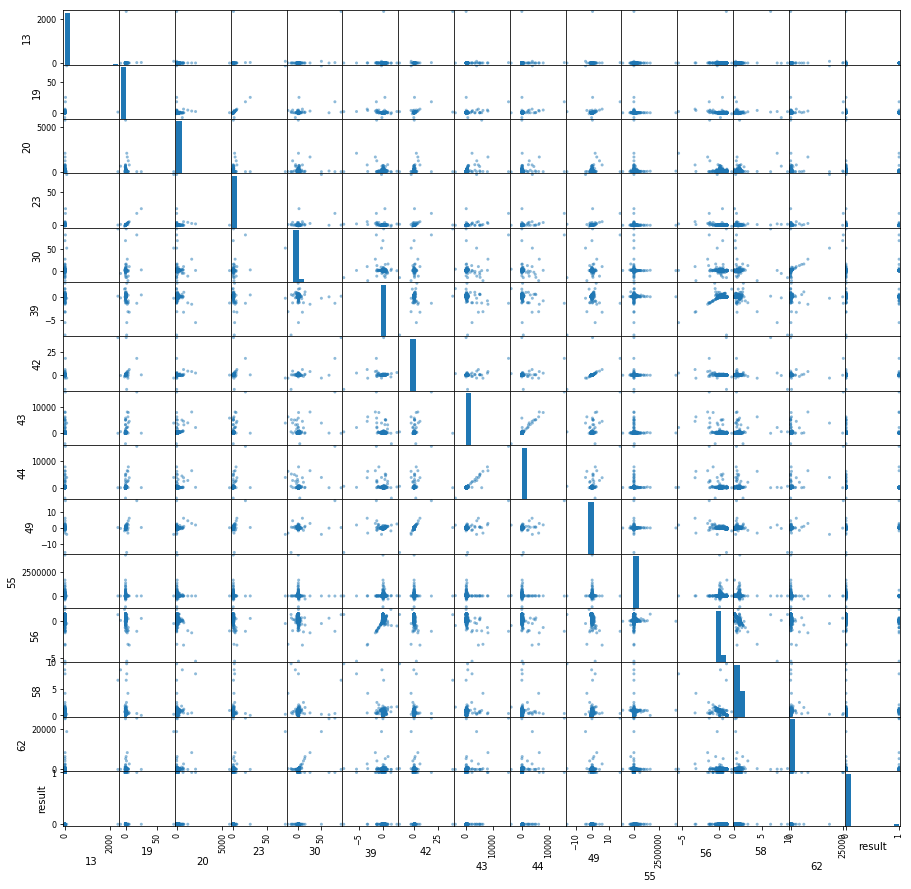

In [76]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (15, 15))
pass

_Корреляция параметров_

In [77]:
data.corr()

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
13,1.000000,0.049113,-0.006571,0.039464,0.598235,0.002200,0.833105,0.007190,0.009846,0.008858,-0.002407,0.056189,0.301729,0.017691,-0.002012
19,0.049113,1.000000,0.008565,0.993124,0.401237,-0.081008,0.053880,0.331115,0.354828,0.034563,-0.001094,-0.081292,-0.083319,0.539297,0.018552
20,-0.006571,0.008565,1.000000,0.017274,0.024584,-0.242721,0.052616,0.390072,0.107603,0.090444,0.007421,-0.237611,0.113523,0.053175,0.032661
23,0.039464,0.993124,0.017274,1.000000,0.399998,-0.076979,0.045867,0.325363,0.345886,0.033789,-0.002155,-0.075662,-0.046171,0.543576,0.018913
30,0.598235,0.401237,0.024584,0.399998,1.000000,-0.003693,0.700022,0.332362,0.351163,0.351785,-0.020406,-0.037362,0.064868,0.760258,0.102736
39,0.002200,-0.081008,-0.242721,-0.076979,-0.003693,1.000000,0.155192,-0.304344,-0.252497,0.296809,0.013295,0.448814,-0.522491,-0.119283,-0.077609
42,0.833105,0.053880,0.052616,0.045867,0.700022,0.155192,1.000000,0.275390,0.280866,0.548471,-0.001069,-0.054535,0.075285,0.211671,0.039315
43,0.007190,0.331115,0.390072,0.325363,0.332362,-0.304344,0.275390,1.000000,0.957411,0.457989,0.000728,-0.290264,0.024812,0.523027,0.096157
44,0.009846,0.354828,0.107603,0.345886,0.351163,-0.252497,0.280866,0.957411,1.000000,0.466143,-0.001540,-0.238897,-0.008800,0.548051,0.093582
49,0.008858,0.034563,0.090444,0.033789,0.351785,0.296809,0.548471,0.457989,0.466143,1.000000,0.003911,-0.250252,-0.263378,0.336413,0.075257


Отрисовка графика для параметров 19 и result

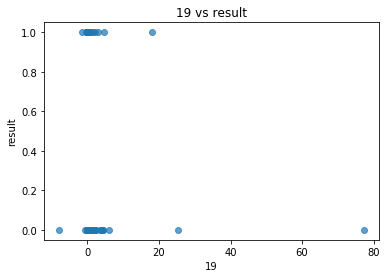

In [92]:
plt.plot(data['19'], data['result'], 'o', alpha = 0.7)
plt.xlabel('19')
plt.ylabel('result')
plt.title('19 vs result')
pass

_Проверка выполнения условия в столбце_

In [93]:
data['result'] == 1 #Фирма обанкротилась

0       False
2       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
17      False
18      False
20      False
21      False
22      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
33      False
34      False
35      False
        ...  
5822     True
5828     True
5829     True
5831     True
5832     True
5834     True
5837     True
5842     True
5844     True
5847     True
5849     True
5854     True
5858     True
5859     True
5861     True
5862     True
5864     True
5867     True
5869     True
5873     True
5874     True
5875     True
5880     True
5887     True
5889     True
5890     True
5892     True
5900     True
5902     True
5905     True
Name: result, Length: 4675, dtype: bool

Диаграмма рассеяния переменных "13" "19" для небанкротов и банкротов. Заметим, что небанкротов(==0) значительно больше.

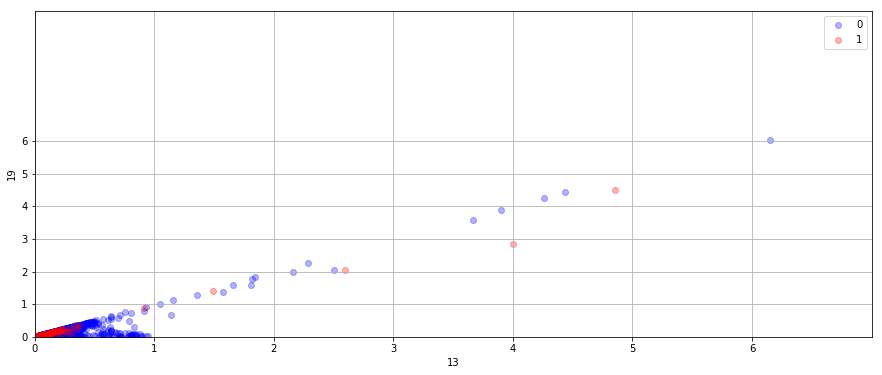

In [123]:
plt.figure(figsize = (15, 6))

plt.scatter(data[data['result'] == 0]['13'],
            data[data['result'] == 0]['19'],
            alpha = 0.3,
            label = '0',
            color = 'b')

plt.scatter(data[data['result'] == 1]['13'],
            data[data['result'] == 1]['19'],
            alpha = 0.3,
            label = '1',
            color = 'r')

plt.xlabel('13')
plt.xticks(range(0,7))
plt.xlim(0, 7)
plt.ylabel('19')
plt.yticks(range(0, 7))
plt.ylim(0, 10)
plt.legend()
plt.grid()

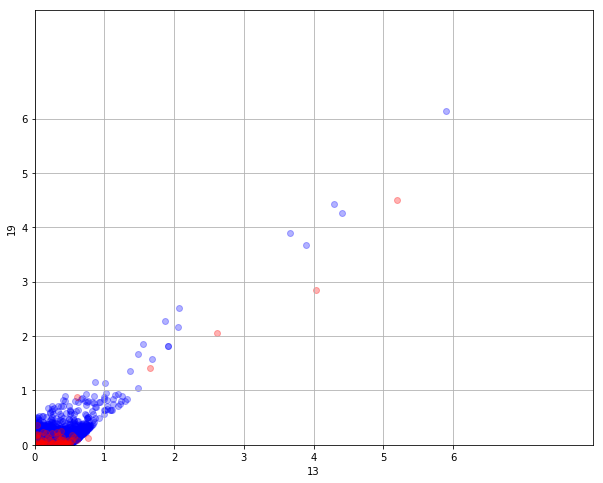

In [124]:
np.random.seed(0)
area_rnd = data['13'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(area_rnd[data['result'] == 0],
            data[data['result'] == 0]['13'],
            alpha = 0.3,
            label = '1',
            color = 'b')

plt.scatter(area_rnd[data['result'] == 1],
            data[data['result'] == 1]['19'],
            alpha = 0.3,
            label = '2',
            color = 'r')

plt.xlabel('13')
plt.xticks(range(0, 7))
plt.xlim(0, 8)
plt.ylabel('19')
plt.yticks(range(0, 7))
plt.ylim(0, 8)
plt.title('')
plt.grid()

Рассмотрим переменные "20" "23" для небанкротов и банкротов. Заметим, что банкротов(==1) значительно больше.

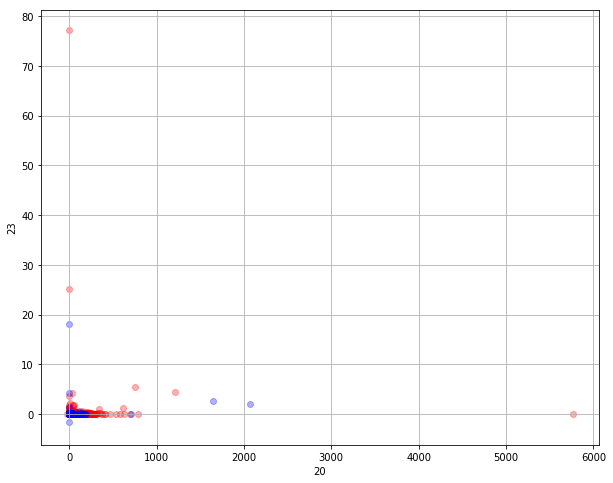

In [126]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['result'] == 0]['20'],
            data[data['result'] == 0]['23'],
            alpha = 0.3,
            label = '0',
            color = 'r')

plt.scatter(data[data['result'] == 1]['20'],
            data[data['result'] == 1]['23'],
            alpha = 0.3,
            label = '1',
            color = 'b')

plt.xlabel('20')
plt.ylabel('23')
plt.grid()

_Параметры стоблцов с типом float_

In [127]:
data.describe(include = ['float'])

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
count,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000
mean,0.654416,0.112258,51.734949,0.102983,0.281696,0.069104,0.090484,135.584600,83.849816,0.039699,1.392728e+04,0.105997,0.894705,104.218204,0.032727
std,34.247364,1.238662,106.918135,1.229937,2.391293,0.202625,0.708604,368.155078,340.970999,0.388529,8.689809e+04,0.205475,0.273964,621.179503,0.177941
min,-7.865600,-7.887600,-29.340000,-1.581800,-23.060000,-8.135600,-15.178000,-3975.600000,-3946.200000,-15.178000,-1.118500e+06,-5.489100,-0.011386,-236.530000,0.000000
25%,0.046762,0.021954,18.264500,0.018171,0.066555,0.020942,0.022682,75.620500,39.851000,-0.001611,3.894050e+02,0.029366,0.862570,41.440000,0.000000
50%,0.086981,0.053929,37.543000,0.045983,0.192450,0.053475,0.055288,105.090000,58.980000,0.028107,2.578200e+03,0.067497,0.933570,67.103000,0.000000
75%,0.153385,0.107735,64.428000,0.092536,0.343485,0.105665,0.105395,145.410000,84.240000,0.075101,9.481400e+03,0.139430,0.972335,103.100000,0.000000
max,2340.200000,77.244000,5772.400000,77.244000,95.728000,2.901100,40.386000,15699.000000,15699.000000,16.866000,4.212200e+06,1.651000,9.711900,25380.000000,1.000000


_Параметры столбцов с любым типом_

In [128]:
data.describe(include = 'all')

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
count,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,...,4675.000000,4675,4675.000000,4675,4675,4675,4675.000000,4675,4675,4675.000000
unique,4419,4451,4475,4343,4583,2657,4449,4458,3800,4446,...,NaN,4374,NaN,2578,4276,4459,NaN,4433,4409,NaN
top,0,0,1,?,?,0,0,?,1.0277,1,...,NaN,0,NaN,0,?,?,NaN,?,?,NaN
freq,37,14,6,19,9,1944,5,16,7,8,...,NaN,87,NaN,2012,199,9,NaN,19,73,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.105997,NaN,0.894705,NaN,NaN,NaN,104.218204,NaN,NaN,0.032727
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.205475,NaN,0.273964,NaN,NaN,NaN,621.179503,NaN,NaN,0.177941
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.489100,NaN,-0.011386,NaN,NaN,NaN,-236.530000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029366,NaN,0.862570,NaN,NaN,NaN,41.440000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067497,NaN,0.933570,NaN,NaN,NaN,67.103000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.139430,NaN,0.972335,NaN,NaN,NaN,103.100000,NaN,NaN,0.000000


_Уникальные значения в столбце_

In [129]:
data['result'].unique()

array([ 0.,  1.])

In [130]:
data['13'].unique()

array([ 0.096885,  0.16568 ,  0.055575, ...,  0.91185 ,  0.026249,
        0.023622])

Значение первого параметра '13' для банкротов и небанкротов

In [131]:
for name in data['result'].unique():
    print(name, data['13'][data['result'] == name].iloc[0])

0.0 0.096885
1.0 0.037078


In [132]:
data['19'].unique()

array([ 0.077287,  0.14349 ,  0.039129, ...,  0.87098 ,  0.026249,
        0.008338])


Удалим необязательные данные, т.к. они малоинформативны

In [161]:
data.drop(data.columns[[ 0,1, 2, 3, 4,5,6,7,8,9,10,11,13,14,15,16,17,20,21,23,24,25,26,27,28,30,31,32,33,34,35,36,37,39,40,44,45,46,47,49,50,51,52,53,56,58,59,60,62]], axis=1)

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,64,result
0,0.096885,0.077287,50.19900,0.062287,0.377880,0.095457,0.095457,127.300,77.096,0.075859,15182.0000,0.080955,0.91905,142.760,3.2597,0.0
2,0.165680,0.143490,41.50800,0.115280,0.050069,0.129100,0.129100,163.710,122.200,0.106920,33401.0000,0.123960,0.87604,71.531,5.6188,0.0
4,0.055575,0.039129,36.07400,0.031802,0.363310,0.240400,0.044632,125.210,89.134,0.028186,1.2437,0.240400,0.77048,106.430,3.3622,0.0
5,0.166890,0.160590,79.22500,0.129260,0.173100,0.184030,0.184110,153.380,74.157,0.177800,7008.8000,0.184030,0.83996,102.580,75.941,0.0
6,0.082929,0.076897,66.78300,0.061722,0.371590,0.083460,0.083460,214.060,147.270,0.077428,6131.0000,0.088581,0.91142,130.020,31.645,0.0
7,0.258440,0.236590,32.07600,0.198920,0.518630,0.191090,0.191090,147.250,115.170,0.169240,12885.0000,0.188420,0.81158,53.575,0.47096,0.0
8,0.160790,0.141590,76.46100,0.111750,0.287400,0.167440,0.167440,139.960,63.502,0.148240,30900.0000,0.191090,0.80891,59.841,2.2274,0.0
9,0.228680,0.179190,37.19400,0.179190,0.331250,0.015611,0.000000,103.430,66.238,-0.049495,1882.3000,0.348820,0.72150,109.700,3.8582,0.0
10,0.137720,0.117690,23.39600,0.094161,0.164940,0.127110,0.127110,130.640,107.250,0.107080,8701.1000,0.127450,0.87255,63.107,7.0902,0.0
11,0.069037,0.048246,47.33900,0.041481,0.059976,0.050957,0.050957,72.361,25.023,0.030166,12778.0000,0.046572,0.95343,32.182,5.6981,0.0


In [162]:
data



,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,result
0,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,0.32036,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
2,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,0.67731,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0.0
4,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0.0
5,0.23156,0.51047,0.47291,1.9393,15.102,0,0.28769,0.95899,1.7915,0.48953,...,0.184030,0.47303,0.83996,0.014242,4.6071,4.922,102.580,3.5581,75.941,0.0
6,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.12395,0.6669,1.0972,0.40009,...,0.088581,0.24866,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.645,0.0
7,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.8672,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.18566,11.379,3.1692,53.575,6.8129,0.47096,0.0
8,0.12504,0.3544,0.31419,2.7127,17.942,0.30575,0.15843,1.8217,1.2362,0.6456,...,0.191090,0.19368,0.80891,0.26479,4.7737,5.7479,59.841,6.0995,2.2274,0.0
9,0.29343,0.58649,0.083392,1.1694,-55.152,-0.28211,0.29343,0.70507,1.6376,0.41351,...,0.348820,0.70961,0.72150,0.021024,9.8135,5.5104,109.700,3.3273,3.8582,0.0
10,0.18514,0.33996,0.38272,2.1258,54.426,0.63035,0.23141,1.8423,1.1461,0.62631,...,0.127450,0.29561,0.87255,0,15.601,3.4034,63.107,5.7838,7.0902,0.0
11,0.090516,0.31429,0.42465,3.2071,24.874,0.055652,0.10528,2.1499,1.0488,0.67569,...,0.046572,0.13396,0.95343,0.1804,7.7104,14.587,32.182,11.342,5.6981,0.0


In [163]:
data['13'].dtype.name

'float64'

In [178]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(numerical_columns)

['13', '19', '20', '23', '30', '39', '42', '43', '44', '49', '55', '56', '58', '62', 'result']


In [179]:
for c in numerical_columns:
    print(c, data[c].unique())

13 [ 0.096885  0.16568   0.055575 ...,  0.91185   0.026249  0.023622]
19 [ 0.077287  0.14349   0.039129 ...,  0.87098   0.026249  0.008338]
20 [  50.199   41.508   36.074 ...,   28.145  108.58    34.344]
23 [ 0.062287  0.11528   0.031802 ...,  0.60975   0.026249  0.007692]
30 [ 0.37788   0.050069  0.36331  ..., -0.21313   0.23638   0.41853 ]
39 [ 0.095457  0.1291    0.2404   ..., -0.15581   0.033762  0.020169]
42 [ 0.095457  0.1291    0.044632 ...,  0.87448   0.037091  0.024093]
43 [ 127.3    163.71   125.21  ...,  150.23   119.04    56.452]
44 [  77.096  122.2     89.134 ...,   41.653   84.7     29.36 ]
49 [ 0.075859  0.10692   0.028186 ...,  0.83361   0.037091  0.008809]
55 [  1.51820000e+04   3.34010000e+04   1.24370000e+00 ...,   2.97980000e+03
   5.67340000e+02   3.59910000e+03]
56 [ 0.080955  0.12396   0.2404   ..., -0.15578   0.17009   0.020169]
58 [ 0.91905  0.87604  0.77048 ...,  0.96072  0.57244  0.82727]
62 [ 142.76    71.531  106.43  ...,   39.557   59.584   49.117]
result 

## Обрабатываем пропущенные значения

Удаление строк или столбцов с пропущенными значениями может существенно уменьшить размер данных, поэтому предпочтительнее заполнить их средним или медианным значениями.

In [181]:
data.median(axis = 0)

13           0.086981
19           0.053929
20          37.543000
23           0.045983
30           0.192450
39           0.053475
42           0.055288
43         105.090000
44          58.980000
49           0.028107
55        2578.200000
56           0.067497
58           0.933570
62          67.103000
result       0.000000
dtype: float64

In [183]:
data = data.fillna(data.median(axis = 0), axis = 0)

_Нет пропущенных данных_

In [184]:
data[numerical_columns].count(axis = 0)

13        4675
19        4675
20        4675
23        4675
30        4675
39        4675
42        4675
43        4675
44        4675
49        4675
55        4675
56        4675
58        4675
62        4675
result    4675
dtype: int64

_Хар-ки столбца_

In [186]:
data['result'].describe()

count    4675.000000
mean        0.032727
std         0.177941
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: result, dtype: float64

In [187]:
type(data['result'].describe())

pandas.core.series.Series

_Заполняем пропущенные значения в столбце_

In [188]:
data['result'] = data['result'].fillna(4)

In [189]:
data.describe(include = [float])

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
count,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000
mean,0.654416,0.112258,51.734949,0.102983,0.281696,0.069104,0.090484,135.584600,83.849816,0.039699,1.392728e+04,0.105997,0.894705,104.218204,0.032727
std,34.247364,1.238662,106.918135,1.229937,2.391293,0.202625,0.708604,368.155078,340.970999,0.388529,8.689809e+04,0.205475,0.273964,621.179503,0.177941
min,-7.865600,-7.887600,-29.340000,-1.581800,-23.060000,-8.135600,-15.178000,-3975.600000,-3946.200000,-15.178000,-1.118500e+06,-5.489100,-0.011386,-236.530000,0.000000
25%,0.046762,0.021954,18.264500,0.018171,0.066555,0.020942,0.022682,75.620500,39.851000,-0.001611,3.894050e+02,0.029366,0.862570,41.440000,0.000000
50%,0.086981,0.053929,37.543000,0.045983,0.192450,0.053475,0.055288,105.090000,58.980000,0.028107,2.578200e+03,0.067497,0.933570,67.103000,0.000000
75%,0.153385,0.107735,64.428000,0.092536,0.343485,0.105665,0.105395,145.410000,84.240000,0.075101,9.481400e+03,0.139430,0.972335,103.100000,0.000000
max,2340.200000,77.244000,5772.400000,77.244000,95.728000,2.901100,40.386000,15699.000000,15699.000000,16.866000,4.212200e+06,1.651000,9.711900,25380.000000,1.000000


In [190]:
data_describe = data.describe(include = [float])
for c in numerical_columns:
    data[c] = data[c].fillna(data_describe[c]['max'])

In [191]:
data.describe(include = [float])

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
count,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000
mean,0.654416,0.112258,51.734949,0.102983,0.281696,0.069104,0.090484,135.584600,83.849816,0.039699,1.392728e+04,0.105997,0.894705,104.218204,0.032727
std,34.247364,1.238662,106.918135,1.229937,2.391293,0.202625,0.708604,368.155078,340.970999,0.388529,8.689809e+04,0.205475,0.273964,621.179503,0.177941
min,-7.865600,-7.887600,-29.340000,-1.581800,-23.060000,-8.135600,-15.178000,-3975.600000,-3946.200000,-15.178000,-1.118500e+06,-5.489100,-0.011386,-236.530000,0.000000
25%,0.046762,0.021954,18.264500,0.018171,0.066555,0.020942,0.022682,75.620500,39.851000,-0.001611,3.894050e+02,0.029366,0.862570,41.440000,0.000000
50%,0.086981,0.053929,37.543000,0.045983,0.192450,0.053475,0.055288,105.090000,58.980000,0.028107,2.578200e+03,0.067497,0.933570,67.103000,0.000000
75%,0.153385,0.107735,64.428000,0.092536,0.343485,0.105665,0.105395,145.410000,84.240000,0.075101,9.481400e+03,0.139430,0.972335,103.100000,0.000000
max,2340.200000,77.244000,5772.400000,77.244000,95.728000,2.901100,40.386000,15699.000000,15699.000000,16.866000,4.212200e+06,1.651000,9.711900,25380.000000,1.000000


## Векторизация

Применим векторизацию к категориальному признаку: банкрот/небанкрот

In [193]:
nonbinary_columns = numerical_columns
print(nonbinary_columns)

['13', '19', '20', '23', '30', '39', '42', '43', '44', '49', '55', '56', '58', '62', 'result']


In [194]:
data['result'].unique()

array([ 0.,  1.])

In [195]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['13', '19', '20', '23', '30', '39', '42', '43', '44', '49', '55', '56',
       '58', '62', 'result'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. В этом случае количественные признаки полезно _нормализовать_.

In [197]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
count,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000
mean,0.654416,0.112258,51.734949,0.102983,0.281696,0.069104,0.090484,135.584600,83.849816,0.039699,1.392728e+04,0.105997,0.894705,104.218204,0.032727
std,34.247364,1.238662,106.918135,1.229937,2.391293,0.202625,0.708604,368.155078,340.970999,0.388529,8.689809e+04,0.205475,0.273964,621.179503,0.177941
min,-7.865600,-7.887600,-29.340000,-1.581800,-23.060000,-8.135600,-15.178000,-3975.600000,-3946.200000,-15.178000,-1.118500e+06,-5.489100,-0.011386,-236.530000,0.000000
25%,0.046762,0.021954,18.264500,0.018171,0.066555,0.020942,0.022682,75.620500,39.851000,-0.001611,3.894050e+02,0.029366,0.862570,41.440000,0.000000
50%,0.086981,0.053929,37.543000,0.045983,0.192450,0.053475,0.055288,105.090000,58.980000,0.028107,2.578200e+03,0.067497,0.933570,67.103000,0.000000
75%,0.153385,0.107735,64.428000,0.092536,0.343485,0.105665,0.105395,145.410000,84.240000,0.075101,9.481400e+03,0.139430,0.972335,103.100000,0.000000
max,2340.200000,77.244000,5772.400000,77.244000,95.728000,2.901100,40.386000,15699.000000,15699.000000,16.866000,4.212200e+06,1.651000,9.711900,25380.000000,1.000000


In [198]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

_Нормализация значений_

In [199]:
data_numerical.describe()

,13,19,20,23,30,39,42,43,44,49,55,56,58,62,result
count,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03
mean,2.119517e-17,2.973943e-16,5.521667e-16,-1.467869e-16,1.849768e-16,-6.235060e-16,3.794647e-17,-5.182307e-16,5.128399e-16,-3.010664e-17,1.468522e-16,-5.822200e-16,-8.675556e-15,3.142940e-16,-1.465656e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.487787e-01,-6.458469e+00,-7.582900e-01,-1.369813e+00,-9.761117e+00,-4.049200e+01,-2.154729e+01,-1.116699e+01,-1.181933e+01,-3.916745e+01,-1.303167e+01,-2.723012e+01,-3.307340e+00,-5.485503e-01,-1.839221e-01
25%,-1.774307e-02,-7.290414e-02,-3.130474e-01,-6.895637e-02,-8.996872e-02,-2.376888e-01,-9.568531e-02,-1.628773e-01,-1.290398e-01,-1.063244e-01,-1.557902e-01,-3.729486e-01,-1.172968e-01,-1.010629e-01,-1.839221e-01
50%,-1.656872e-02,-4.708998e-02,-1.327366e-01,-4.634383e-02,-3.732128e-02,-7.713135e-02,-4.967016e-02,-8.283086e-02,-7.293821e-02,-2.983592e-02,-1.306021e-01,-1.873733e-01,1.418617e-01,-5.974956e-02,-1.839221e-01
75%,-1.462976e-02,-3.651160e-03,1.187175e-01,-8.493909e-03,2.583910e-02,1.804377e-01,2.104216e-02,2.668821e-02,1.144333e-03,9.111637e-02,-5.116194e-02,1.627088e-01,2.833585e-01,-1.800130e-03,-1.839221e-01
max,6.831316e+01,6.227023e+01,5.350510e+01,6.271950e+01,3.991409e+01,1.397652e+01,5.686609e+01,4.227408e+01,4.579612e+01,4.330768e+01,4.831260e+01,7.519189e+00,3.218381e+01,4.068998e+01,5.435921e+00


# Соединяем в одну таблицу

In [200]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
data.describe()

,13,19,20,23,30,39,42,43,44,49,...,39,42,43,44,49,55,56,58,62,result
count,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,4.675000e+03,...,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4.675000e+03,4675.000000,4675.000000,4675.000000,4675.000000
mean,2.119517e-17,2.973943e-16,5.521667e-16,-1.467869e-16,1.849768e-16,-6.235060e-16,3.794647e-17,-5.182307e-16,5.128399e-16,-3.010664e-17,...,0.069104,0.090484,135.584600,83.849816,0.039699,1.392728e+04,0.105997,0.894705,104.218204,0.032727
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.202625,0.708604,368.155078,340.970999,0.388529,8.689809e+04,0.205475,0.273964,621.179503,0.177941
min,-2.487787e-01,-6.458469e+00,-7.582900e-01,-1.369813e+00,-9.761117e+00,-4.049200e+01,-2.154729e+01,-1.116699e+01,-1.181933e+01,-3.916745e+01,...,-8.135600,-15.178000,-3975.600000,-3946.200000,-15.178000,-1.118500e+06,-5.489100,-0.011386,-236.530000,0.000000
25%,-1.774307e-02,-7.290414e-02,-3.130474e-01,-6.895637e-02,-8.996872e-02,-2.376888e-01,-9.568531e-02,-1.628773e-01,-1.290398e-01,-1.063244e-01,...,0.020942,0.022682,75.620500,39.851000,-0.001611,3.894050e+02,0.029366,0.862570,41.440000,0.000000
50%,-1.656872e-02,-4.708998e-02,-1.327366e-01,-4.634383e-02,-3.732128e-02,-7.713135e-02,-4.967016e-02,-8.283086e-02,-7.293821e-02,-2.983592e-02,...,0.053475,0.055288,105.090000,58.980000,0.028107,2.578200e+03,0.067497,0.933570,67.103000,0.000000
75%,-1.462976e-02,-3.651160e-03,1.187175e-01,-8.493909e-03,2.583910e-02,1.804377e-01,2.104216e-02,2.668821e-02,1.144333e-03,9.111637e-02,...,0.105665,0.105395,145.410000,84.240000,0.075101,9.481400e+03,0.139430,0.972335,103.100000,0.000000
max,6.831316e+01,6.227023e+01,5.350510e+01,6.271950e+01,3.991409e+01,1.397652e+01,5.686609e+01,4.227408e+01,4.579612e+01,4.330768e+01,...,2.901100,40.386000,15699.000000,15699.000000,16.866000,4.212200e+06,1.651000,9.711900,25380.000000,1.000000


# X и y

In [201]:
X = data.drop(('result'), axis = 1) # выбрасываем столбец 'result'
y = data['result']
feature_names = X.columns


In [202]:
type(feature_names)

pandas.core.indexes.base.Index

In [203]:
feature_names

Index(['13', '19', '20', '23', '30', '39', '42', '43', '44', '49', '55', '56',
       '58', '62', '13', '19', '20', '23', '30', '39', '42', '43', '44', '49',
       '55', '56', '58', '62'],
      dtype='object')

In [204]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4675, 28)
(4675, 2)


In [205]:
type(X)

pandas.core.frame.DataFrame

In [206]:
type(y)

pandas.core.frame.DataFrame

_Получаем обучающие и тестовые выборки (их размеры в пропорции 70% и 30%)_

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)


3272 1403


# $k$NN
Будем предсказывать банкрот ли компания или нет. Объявляем классификатор с параметром $k$ = 10. Проводим обучение модели на обучающей выборке X_train, y_train

In [223]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous-multioutput'

In [224]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

_Применяем метод predict. Считаем среднюю ошибку_

In [225]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

NotFittedError: Must fit neighbors before querying.

_Можно посчитать ошибку как 1 - точность, вычисленную через метод score в knn_

In [226]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

NotFittedError: Must fit neighbors before querying.

In [227]:
err_test

NameError: name 'err_test' is not defined

_С помощью метода confusion matrix можно вычислить точность работы классификатора. Элемент матрицы (i, j) равен числу объектов из группы i, а предсказанных в группу j_

In [67]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]


### Подбор параметров

_Подберем оптимальное(по величине ошибки) значение параметра $k$. В данной выборке получаем $k$=15 с ошибкой ~0.05_

In [233]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

ValueError: Unknown label type: 'continuous-multioutput'

_Проведем классификацию и посчитаем ошибки при данном параметре $k$_

In [69]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0612244897959 0.111111111111


## Нейронные сети
Проведем задачу классификации компаний на банкротство с помощью нейронных сетей

_Разобъем данные на тестовую и обучающую выборки_

In [185]:
data[categorical_columns].count(axis = 0)

NameError: name 'categorical_columns' is not defined

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

_Обучаем классификатор вида многослойного персептрона. Активационная функций: логистическая сигмоидальная f(x) = 1 / (1 + exp(-x)). Один скрытый слой с 10-ю нейронами_

In [229]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

ValueError: Multioutput target data is not supported with label binarization

_Предсказываем является ли компания банкротом и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [72]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.00714285714286 0.0


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.02_

_Попробуем использовать персептрон с двумя скрытыми слоями по 10 нейронов в каждом_

In [73]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10, 10), solver = 'lbfgs', activation = 'logistic', random_state = 24)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=24, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

_Проверям качество получившегося классификатора по величине ошибки на тестовой и обучающей выборках_

In [74]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0285714285714 0.0


_Ошибка на тестовой выборке равна 0, значит будем использовать сеть с двумя скрытыми слоями_

### Подбор параметра alpha и числа нейронов
Подберем _оптимальное_ значение параметра регуляризации `alpha`

In [75]:
alpha_arr = np.logspace(-1, 0.5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10, 10), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

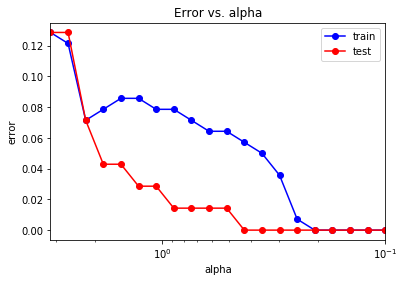

In [76]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [77]:
print(alpha_arr)

[ 0.1         0.11993539  0.14384499  0.17252105  0.20691381  0.24816289
  0.29763514  0.35696988  0.42813324  0.51348329  0.61584821  0.73861998
  0.88586679  1.06246783  1.27427499  1.52830673  1.83298071  2.19839265
  2.6366509   3.16227766]


_При alpha от 2.2 до 0.24 наблюдаем переобучение. Параметр регуляризации должен быть достаточно малым (<0.2)_

_Минимальное значение ошибки_

In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


_Оптимальное значение alpha_

In [79]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.1


### Найдем оптимальное количество нейронов
Используем в качестве alpha значение значение по умолчанию (0.0001). Количество скрытых слоев = 2.

In [80]:
neurons_arr = np.arange(2, 10, 1)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons, neurons), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 24)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

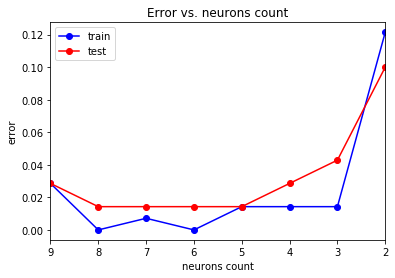

In [81]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'train')
plt.plot(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

_Видно, что 6 и 8 нейронов в скрытых слоях являются оптимальным (по величине ошибки) количеством. При 2 нейронах наблюдается несильное переобучение_

_Минимальное значение ошибки_

In [82]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0142857142857


_Оптимальное число нейронов_

In [83]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)
neurons_opt = neurons_opt[0]

[5 6 7 8]


_Разобъем данные на тестовую и обучающую выборки_

In [185]:
data[categorical_columns].count(axis = 0)

NameError: name 'categorical_columns' is not defined

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

_Обучаем классификатор вида случайного леса. Число деревьев = 10_

In [118]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

_Предсказываем является ли компания банкротом и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [119]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.015873015873 0.122448979592


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.12_

_Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев_

In [87]:
trees_arr = np.arange(15, 100, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

C:\university\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\university\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


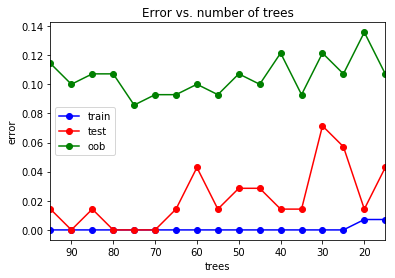

In [88]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [89]:
print(trees_arr)

[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


_При количестве деревьев в лесу равном 40-45 наблюдаем переобучение. Также видно, что для уменьшения oob-ошибки количество деревьев не должно быть малым (<40). При числе деревьев равному 50 имеется минимум oob-ошибки, ошибки на тестовой и обучающей совпадают и равны нулю._

_Минимальное значение ошибки_

In [90]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


_Оптимальное количество деревьев_

In [91]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

70


## Extremely Randomized Trees
Проведем классификацию компаний на банкротство с помощью Extremely Randomized Trees классификатора.

_Разобъем данные на тестовую и обучающую выборки_

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

_Обучаем классификатор вида Extremely Randomized Trees. Число деревьев = 100_

In [93]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

_Предсказываем является ли компания банкротом и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [94]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.0142857142857


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.014_

_Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев. Указываем bootstrap=True для генерации случайной bootstrap-выборки из обучащей_

In [95]:
trees_arr = np.arange(15, 100, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = trees, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

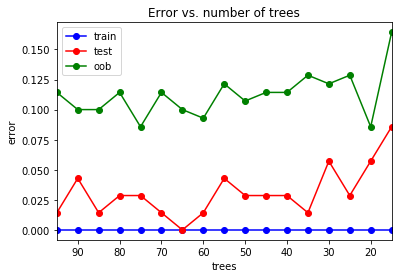

In [96]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [97]:
print(trees_arr)

[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


_При малом количестве деревьев наблюдаем переобучение. Как и для Random Forest видим, что малое количество деревьев (<40) негативно влияет на величину oob-ошибки._

_Минимальное значение ошибки_

In [98]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


_Оптимальное количество деревьев_

In [99]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

65


## AdaBoost
Проведем классификацию компаний на банкротство с помощью AdaBoost классификатора.

_Разобъем данные на тестовую и обучающую выборки_

In [232]:
data[categorical_columns].count(axis = 0)

NameError: name 'categorical_columns' is not defined

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)

_Обучаем классификатор вида Ada Boost. Число классификаторов (по умолчанию DecisionTreeClassifier) = 100_

In [101]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

_Предсказываем является ли компания банкротом и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [102]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print(err_train, err_test)

0.342857142857 0.266666666667


_Ошибка на тестовой выборке меньше, чем на обучающей. Переобучение не наблюдается_

_Построим график зависимости ошибки на тестовой и обучающей выборках. Параметр learningrate уменьшает вклад каждого классификатора._

In [103]:
estim_arr = np.arange(15, 100, 5)
test_err = []
train_err = []
for estim in estim_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estim, learning_rate = 0.5)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

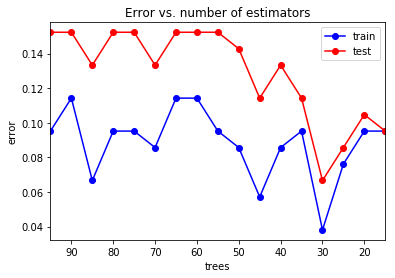

In [104]:
plt.plot(estim_arr, train_err, 'b-o', label = 'train')
plt.plot(estim_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(estim_arr), np.min(estim_arr)])
plt.title('Error vs. number of estimators')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [105]:
print(estim_arr)

[15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


_Наблюдаем достаточно низкую ошибку при количестве классификаторов <30. При большем количестве классификаторов имеется переобучение_

_Минимальное значение ошибки_

In [106]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0380952380952 0.0666666666667


_Оптимальное количество классификаторов_

In [107]:
estim_opt = estim_arr[test_err == min_test_err]
estim_opt = estim_opt[0]
print(estim_opt)

30


## GBT
Проведем классификацию компаний на банкротство с помощью Gradient Boosted Trees классификатора.

_Разобъем данные на тестовую и обучающую выборки_

In [185]:
data[categorical_columns].count(axis = 0)

NameError: name 'categorical_columns' is not defined

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)

_Обучаем классификатор вида Gradient Boosted Trees. Число деревьев = 100_

In [109]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

_Предсказываем является ли компания банкротом и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [110]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.047619047619


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.04_

_Построим график зависимости ошибки на тестовой и обучающей выборках. Параметр learningrate уменьшает вклад каждого дерева, по умолчанию равен 0.1_

In [111]:
trees_arr = np.arange(2, 20, 2)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

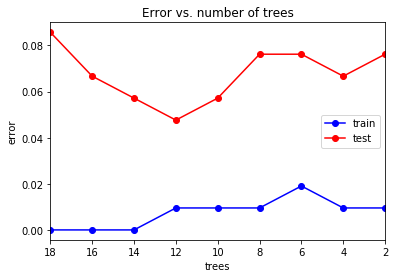

In [112]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [113]:
print(trees_arr)

[ 2  4  6  8 10 12 14 16 18]


_При количестве деревьев > 12 наблюдаем переобучение. При малом числе (>6) ошибка на тестовой выборке достигает локального максимума. Предпочтительным числом деревьев можно указать 8-12_

_Минимальное значение ошибки_

In [114]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.047619047619


_Оптимальное количество деревьев_

In [115]:
trees_opt = trees_arr[test_err == min_test_err]
trees_opt = trees_opt[0]
print(trees_opt)

12


## Principal component analysis (PCA)
Уменьшим размерность данных с помощью метода главных компонент. Далее проведем классификацию компаний на банкротство с помощью классификатора Extremely Randomized Trees.

_Разобъем данные на тестовую и обучающую выборки_

In [185]:
data[categorical_columns].count(axis = 0)

NameError: name 'categorical_columns' is not defined

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 6)

_Обучаем PCA. Исходные данные содержат 7 столбцов. Уменьшим размерность до 5_

In [161]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 5)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

_Обучаем классификатор вида Extremely Randomized Trees. Число деревьев = 100_

In [162]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train_reduc, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

_Предсказываем банкротство компании и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках_

In [163]:
err_train = np.mean(y_train != ert.predict(X_train_reduc))
err_test  = np.mean(y_test  != ert.predict(X_test_reduc))

print(err_train, err_test)

0.0 0.047619047619


_Наблюдаем переобучение, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей, и составила ~0.06. Тестовая ошибка на не редуцированных данных (была получена ранее) составляла 0.014. На ошибку по обучающей выборке редукция размерности не повлияла._

_Построим график зависимости ошибки на тестовой и обучающей выборках от количества компонент в методе._

In [164]:
components_arr = np.arange(1, 8, 1)
test_err = []
train_err = []
oob_err = []
for components in components_arr:
    pca = decomposition.PCA(n_components = components)
    X_train_reduc = pca.fit_transform(X_train)
    X_test_reduc = pca.transform(X_test)
    ert = ensemble.ExtraTreesClassifier(n_estimators = 100, oob_score=True, bootstrap=True)
    ert.fit(X_train_reduc, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train_reduc)))
    test_err.append(np.mean(y_test  != ert.predict(X_test_reduc)))
    oob_err.append(1 - ert.oob_score_)

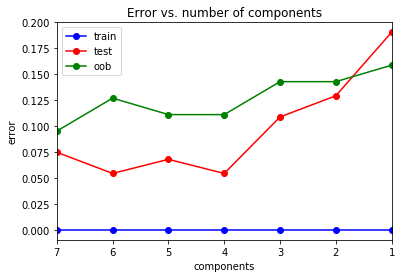

In [165]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(components_arr), np.min(components_arr)])
plt.title('Error vs. number of components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [166]:
print(components_arr)

[1 2 3 4 5 6 7]


_На графике видно, что при редукции размерности до 4-6 ошибка на тестовой выборке примерно одинаковая и составила ~0.06. При уменьшении числа компонент ошибка растет, т.е. наблюдаем переобучение. Величина OOB-ошибки немного больше и также увеличивается при уменьшении числа компонент._

_Минимальное значение ошибки_

In [167]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0544217687075


_Оптимальное количество компонент_

In [168]:
components_opt = components_arr[test_err == min_test_err]
components_opt = components_opt[0]
print(components_opt)

4
